In [1]:
import numpy as np # çok boyutlu dizilerle ve matrislerle çalışmamıza yardım eden ileri düzey matematiksel işlemler yapabileceğimiz bir kütüphanedir. 
import pandas as pd # pandas, “ilişkisel” ve “etiketli” verilerle çalışmayı kolay ve sezgisel hale getirmek için tasarlanmış hızlı, esnek ve etkileyici veri yapıları sağlayan bir Python paketidir.
import matplotlib.pyplot as plt # grafik görselleştirme kütüphanesi
import seaborn as sbn 

In [2]:
dataFrameVerisi =pd.read_csv("insurance.csv") # pandas kütüphanesi yardımıyla verimizi projemize DataFrame serisi olarak dahil ettik.
dataFrameVerisi

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# genel bilgiler
dataFrameVerisi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


C:\Users\omerp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


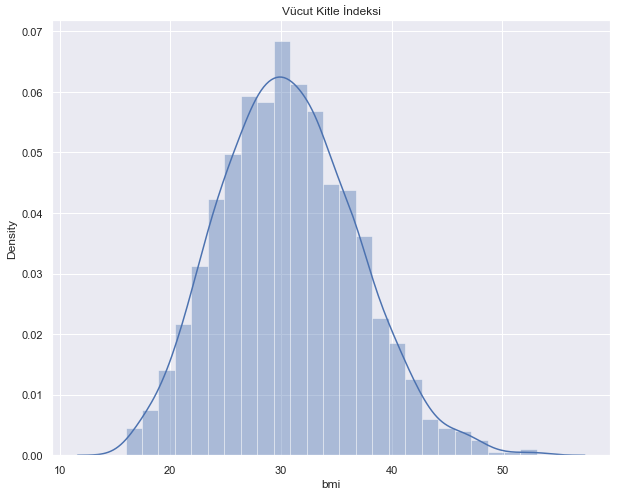

In [4]:
# Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz

sbn.set()
plt.figure(figsize=(10,8))
sbn.distplot(dataFrameVerisi['bmi'])
plt.title('Vücut Kitle İndeksi')
plt.show()

#bmi(vücut kitle indeksi) 25-35 arasında ve tepe noktasında 30 olduğu gözlenmektedir.

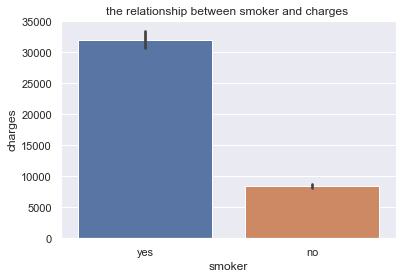

In [5]:
# “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz
plt.xlabel("smoker")
plt.ylabel("charges")
plt.title("the relationship between smoker and charges ")
sbn.barplot(x=dataFrameVerisi["smoker"], y=dataFrameVerisi["charges"])
plt.show()

#sigara içenlerin maaliyeti daha yüksek görünmektedir. Sigara içenlerin ,sigara içmeyenlerden 1.5 kat daha fazla sağlık için ödeme yaptığı gözlenmektedir.  

In [6]:
dataFrameVerisi['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

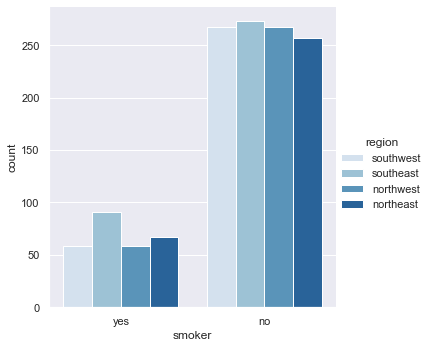

In [7]:
# “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz
sbn.catplot(x="smoker", kind="count",hue = 'region', palette="Blues", data=dataFrameVerisi)

#sigara içenlerin ve içmeyenlerin southeast bölgesinde yoğunlaştığı gözlenmektedir. Sigara içmeyenlerin oranına göre northeast en düşük bölge olduğu görülmektedir.

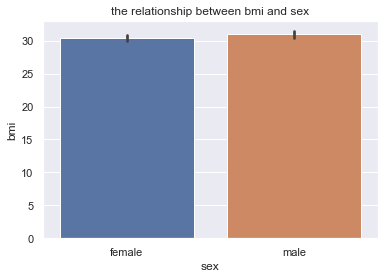

In [8]:
# “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.
plt.xlabel("sex")
plt.ylabel("bmi(vücut kitle indeksi)")
plt.title("the relationship between bmi and sex")
sbn.barplot(x=dataFrameVerisi["sex"], y=dataFrameVerisi["bmi"])
plt.show()

<AxesSubplot:xlabel='children', ylabel='count'>

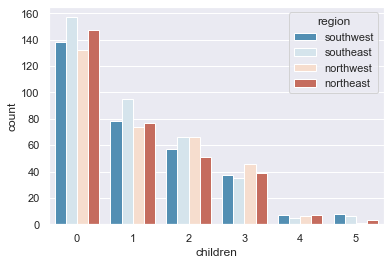

In [9]:
#  En çok “children”’a sahip “region”’ı bulunuz.
sbn.countplot(x='children',hue='region',data=dataFrameVerisi,palette='RdBu_r')

#incelenen verilere göre çocuk sahibi olmayan insanların en çok bulunduğu bölge southeast olduğu, en az bölgenin de northwest olduğu gözlenmektedir.
#incelenen verilere göre çocuk sahibi olan insanların en çok bulunduğu bölge southwest olduğu gözlenmektedir.

<AxesSubplot:xlabel='age', ylabel='bmi'>

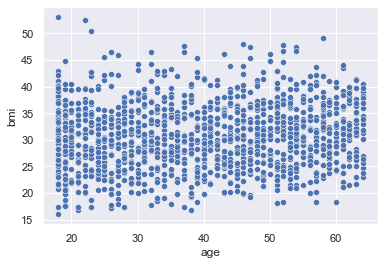

In [10]:
# “Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.
sbn.scatterplot(x="age",y="bmi",data=dataFrameVerisi)

#20-30 yaş arasındaki vücut kitle indeksinin daha yoğun olduğu gözlenmektedir.

<AxesSubplot:xlabel='children', ylabel='bmi'>

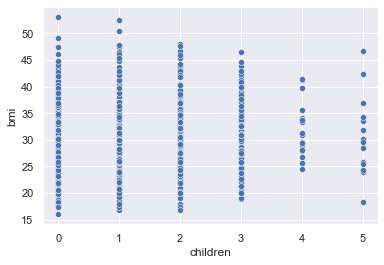

In [11]:
# “bmi” ile “children” arasındaki ilişkiyi inceleyiniz
sbn.scatterplot(x="children",y="bmi",data=dataFrameVerisi)

#çocuk sayısı az oldukça vücut kitle indeksinin daha yüksek olduğu gözlenmektedir.

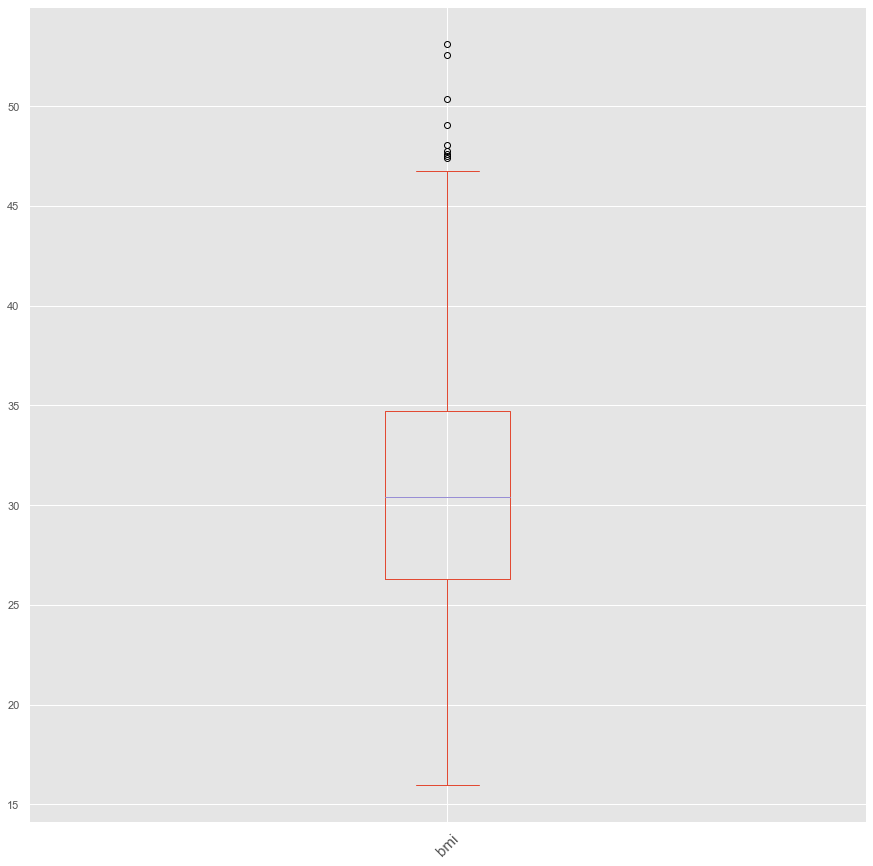

<Figure size 2160x1080 with 0 Axes>

In [12]:
# "bmi” değişkeninde outlier var mıdır? İnceleyiniz
# Outlier of bmi Column

plt.style.use('ggplot')
ax = dataFrameVerisi['bmi'].plot.box(figsize=(15, 15))
plt.figure(figsize=(30, 15))
ax.tick_params(axis='x', labelrotation=45, labelsize=15)

#ASD ve ÜSD dışında kalan tüm değerler outlier (aykırı değer) olarak tespit edilir. Veri keşfinde kullandığımız kuru grafikleri (boxplot) kartil mantığında veriyi gösrselleştirmektedirler.

BMI sütununda aykırı değer olduğu görülmektedir.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

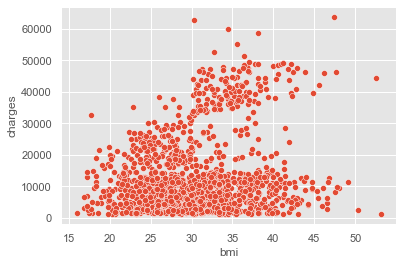

In [13]:
# “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz
sbn.scatterplot(x="bmi",y="charges",data=dataFrameVerisi)

#vücut kitle indeksinin 20-35 arasında yüksek olduğu için sağlık harcamaları daha az olduğu gözlenmektedir. 

<AxesSubplot:xlabel='region', ylabel='bmi'>

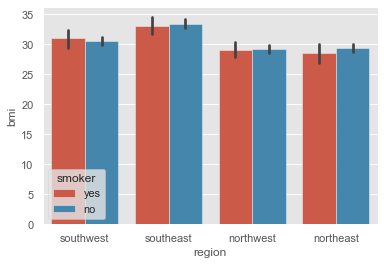

In [14]:
# “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.

#Barplot with Hue Smoker
sbn.barplot(x = dataFrameVerisi['region'], y = dataFrameVerisi['bmi'], hue = dataFrameVerisi['smoker'], data = dataFrameVerisi)

#bölgelere göre vücut kitle indeksi kırılımına göre sigara içen ve içmeyenlerin keşifsel veri analizi. 

In [15]:
# verinin şekli (satır, sütun)

dataFrameVerisi.shape

(1338, 7)

In [16]:
# toplam gözlem sayısı (n)

len(dataFrameVerisi)

1338

In [17]:
# sütunlar

dataFrameVerisi.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
# toplam sütun sayısı

len(dataFrameVerisi.columns)

7

In [19]:
# kaç adet numerik sütun var
# charges (y) da numerik bir sütun

len(dataFrameVerisi.describe().columns)

4

Verinin içinde:

Toplam 7 sütun var

Bunlardan 6'sı girdi (input) sütunları, 1'i çıktı (y) sütunu

Girdi sütunlarının 3'i sayısal sütun, 3'u kategorik

In [20]:
#null olan değer var mı kontrol edilir.
print(dataFrameVerisi.isnull().sum())
#tekrar eden veri varsa silinir. veri tekrar kontrol edilir.
print(dataFrameVerisi[dataFrameVerisi.duplicated()])
dataFrameVerisi.drop(581, axis=0, inplace=True)
print(dataFrameVerisi.info())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None


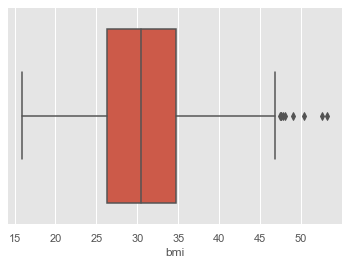

Q1: 26.29 , Q2: 30.4 ve Q3: 34.7 IQR=8.410000000000004
alt sınır:  13.674999999999994    üst sınır:  47.31500000000001
verilerdeki outlier:        age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.5523

C:\Users\omerp\AppData\Local\Temp/ipykernel_25184/2147176007.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_df = dataFrameVerisi[(sorted_bmi < alt_sınır) | (sorted_bmi > ust_sınır)]


In [21]:
#veriyi hazır hale getirmek için öncelikle outlier verileri çıkarmamız gerekir.
sbn.boxplot(x=dataFrameVerisi["bmi"])
#sns.boxplot(x=df["charges"])
plt.show()
sorted_bmi=dataFrameVerisi["bmi"].sort_values()
Q1=dataFrameVerisi["bmi"].quantile(0.25)
Q2=dataFrameVerisi["bmi"].quantile(0.5)
Q3=dataFrameVerisi["bmi"].quantile(0.75)
IQR=Q3-Q1
print(f"Q1: {Q1} , Q2: {Q2} ve Q3: {Q3} IQR={IQR}")
alt_sınır=Q1-(1.5*IQR)
ust_sınır=Q3+(1.5*IQR)
print("alt sınır: ", alt_sınır, " ", " üst sınır: ",ust_sınır)

outlier_df = dataFrameVerisi[(sorted_bmi < alt_sınır) | (sorted_bmi > ust_sınır)]
print("verilerdeki outlier: ", outlier_df)
#outlier verileri data dan sileriz, temizlediğimiz data
clean_data=dataFrameVerisi[dataFrameVerisi["bmi"] < 47.41]
print(clean_data)

## Veri Ön İşleme Yapılması

### Label Encoding ve One-Hot Encoding

In [22]:
#sex ve smoker hiyerarşik yapıda olmadığından label encoding ile verileri sayısallaştırabiliriz.

import sklearn.preprocessing

le=sklearn.preprocessing.LabelEncoder()
clean_data["new_sex"]=le.fit_transform(clean_data["sex"])
clean_data["new_smoker"]=le.fit_transform(clean_data["smoker"])
print(clean_data)

      age     sex     bmi  children smoker     region      charges  new_sex  \
0      19  female  27.900         0    yes  southwest  16884.92400        0   
1      18    male  33.770         1     no  southeast   1725.55230        1   
2      28    male  33.000         3     no  southeast   4449.46200        1   
3      33    male  22.705         0     no  northwest  21984.47061        1   
4      32    male  28.880         0     no  northwest   3866.85520        1   
...   ...     ...     ...       ...    ...        ...          ...      ...   
1333   50    male  30.970         3     no  northwest  10600.54830        1   
1334   18  female  31.920         0     no  northeast   2205.98080        0   
1335   18  female  36.850         0     no  southeast   1629.83350        0   
1336   21  female  25.800         0     no  southwest   2007.94500        0   
1337   61  female  29.070         0    yes  northwest  29141.36030        0   

      new_smoker  
0              1  
1            

C:\Users\omerp\AppData\Local\Temp/ipykernel_25184/797066559.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["new_sex"]=le.fit_transform(clean_data["sex"])
C:\Users\omerp\AppData\Local\Temp/ipykernel_25184/797066559.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["new_smoker"]=le.fit_transform(clean_data["smoker"])


In [23]:
#region 4 alt bölgeden oluşmaktadır, onehotencoding ile sayısallaştıabiliriz
#sex ve smoker sütunlarını veriden alırız.
clean_data.drop(columns=["sex","smoker"],axis=1 ,inplace=True)

clean_data=pd.get_dummies(data=clean_data, columns=["region"],prefix=["region"])
print(clean_data.head(5))
print(clean_data.info())

   age     bmi  children      charges  new_sex  new_smoker  region_northeast  \
0   19  27.900         0  16884.92400        0           1                 0   
1   18  33.770         1   1725.55230        1           0                 0   
2   28  33.000         3   4449.46200        1           0                 0   
3   33  22.705         0  21984.47061        1           0                 0   
4   32  28.880         0   3866.85520        1           0                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------      

C:\Users\omerp\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Eğitim / Test verisine bölme

In [24]:
from sklearn.model_selection import train_test_split
X = clean_data.drop(columns = 'charges', axis = 1)
y = clean_data['charges'].values

In [25]:
print(X)

      age     bmi  children  new_sex  new_smoker  region_northeast  \
0      19  27.900         0        0           1                 0   
1      18  33.770         1        1           0                 0   
2      28  33.000         3        1           0                 0   
3      33  22.705         0        1           0                 0   
4      32  28.880         0        1           0                 0   
...   ...     ...       ...      ...         ...               ...   
1333   50  30.970         3        1           0                 0   
1334   18  31.920         0        0           0                 1   
1335   18  36.850         0        0           0                 0   
1336   21  25.800         0        0           0                 0   
1337   61  29.070         0        0           1                 0   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0               

In [26]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [27]:
X_train, X_test ,y_train ,y_test = train_test_split(X,y,test_size = 0.2 , random_state=35)
print('shape of X_train :',X_train.shape)
print('shape of X_test :',X_test.shape)
print('shape of y_train :',y_train.shape)
print('shape of y_test :',y_test.shape)

shape of X_train : (1062, 9)
shape of X_test : (266, 9)
shape of y_train : (1062,)
shape of y_test : (266,)


In [28]:
# StandardScaler yarat

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# X_train üzerinde fit ve transform yap
X_train = scaler.fit_transform(X_train)

# X_test'i transform yap
X_test = scaler.transform(X_test)

### Model 1 => LineerRegressor

In [29]:
from sklearn.linear_model import LinearRegression 
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_tahminlinReg= linReg.predict(X_test)

In [30]:
tahminDFlinReg = pd.DataFrame(y_test,columns=["Gerçek Y"])
tahminDFlinReg

,Gerçek Y
0,28950.46920
1,8703.45600
2,16577.77950
3,28868.66390
4,5469.00660
...,...
261,27724.28875
262,13770.09790
263,7954.51700
264,2483.73600


In [31]:
testTahminlerilinReg = pd.Series(y_tahminlinReg.reshape(266,))
testTahminlerilinReg

0      36769.912827
1       9720.186827
2      26000.722332
3      37038.267114
4       6624.623160
           ...     
261     4615.293096
262    13421.794613
263    10292.699592
264     1613.139250
265     1747.448846
Length: 266, dtype: float64

In [32]:
tahminDF= pd.concat([tahminDFlinReg,testTahminlerilinReg],axis=1)
tahminDF.columns = ["Gerçek Y-LinReg", "Tahmin Y-LinReg"]

tahminDF

,Gerçek Y-LinReg,Tahmin Y-LinReg
0,28950.46920,36769.912827
1,8703.45600,9720.186827
2,16577.77950,26000.722332
3,28868.66390,37038.267114
4,5469.00660,6624.623160
...,...,...
261,27724.28875,4615.293096
262,13770.09790,13421.794613
263,7954.51700,10292.699592
264,2483.73600,1613.139250


## Modeli Değerlendirme

In [33]:
# Metric Libraris
from sklearn.metrics import mean_squared_error          # MSe
from sklearn.metrics import r2_score                    # R²  
from sklearn import metrics


In [34]:
print('RSquared_LinReg:', r2_score(y_test, testTahminlerilinReg)) 
print('Mean Squared Error_LinReg:', metrics.mean_squared_error(y_test, testTahminlerilinReg)) 

RSquared_LinReg: 0.7472890247523998
Mean Squared Error_LinReg: 34292933.26937035


### Model 2 => GradientBoostingRegressor

In [35]:
from sklearn import ensemble


gbregressor = ensemble.GradientBoostingRegressor()
gbregressor.fit(X_train,y_train)
y_tahminGbr = gbregressor.predict(X_test)

In [36]:
tahminDFGbr = pd.DataFrame(y_test,columns=["Gerçek Y"])
tahminDFGbr

,Gerçek Y
0,28950.46920
1,8703.45600
2,16577.77950
3,28868.66390
4,5469.00660
...,...
261,27724.28875
262,13770.09790
263,7954.51700
264,2483.73600


In [37]:
testTahminleriGbr = pd.Series(y_tahminGbr.reshape(266,))
testTahminleriGbr

0      27589.503608
1       9726.613866
2      17615.320964
3      29748.253956
4       5947.391249
           ...     
261     3210.994952
262    14016.989464
263     7582.325262
264     5263.799225
265     2951.824375
Length: 266, dtype: float64

In [38]:
tahminDF1= pd.concat([tahminDFGbr,testTahminleriGbr],axis=1)
tahminDF1.columns = ["Gerçek Y-GBR", "Tahmin Y-GBR"]

tahminDF1

,Gerçek Y-GBR,Tahmin Y-GBR
0,28950.46920,27589.503608
1,8703.45600,9726.613866
2,16577.77950,17615.320964
3,28868.66390,29748.253956
4,5469.00660,5947.391249
...,...,...
261,27724.28875,3210.994952
262,13770.09790,14016.989464
263,7954.51700,7582.325262
264,2483.73600,5263.799225


## Modeli Değerlendirme


In [39]:
# Metric Libraris
from sklearn.metrics import mean_squared_error          # MSe
from sklearn.metrics import r2_score                    # R²  
from sklearn import metrics


In [40]:
print('RSquared_GbReg:', r2_score(y_test, testTahminleriGbr)) 
print('Mean Squared Error_GbReg:', metrics.mean_squared_error(y_test, testTahminleriGbr)) 


RSquared_GbReg: 0.849880897827711
Mean Squared Error_GbReg: 20371194.200046834


### Model 3 => DecisionTreeRegressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor(max_depth=4, random_state=0)
DTReg.fit(X_train, y_train)
y_tahminDtR = DTReg.predict(X_test)


In [42]:
tahminDf2 = pd.DataFrame(y_test,columns=["Gerçek Y"])
tahminDf2

,Gerçek Y
0,28950.46920
1,8703.45600
2,16577.77950
3,28868.66390
4,5469.00660
...,...
261,27724.28875
262,13770.09790
263,7954.51700
264,2483.73600


In [43]:
testTahminleriDtR = pd.Series(y_tahminDtR.reshape(266,))
testTahminleriDtR

0      27321.628333
1       9584.982696
2      16871.737665
3      27321.628333
4       6179.498867
           ...     
261     2572.132669
262    15319.479112
263     8200.707048
264     6179.498867
265     6179.498867
Length: 266, dtype: float64

In [44]:
tahminDF2= pd.concat([tahminDf2,testTahminleriDtR],axis=1)
tahminDF2.columns = ["Gerçek Y-DtR", "Tahmin Y-DtR"]

tahminDF2

,Gerçek Y-DtR,Tahmin Y-DtR
0,28950.46920,27321.628333
1,8703.45600,9584.982696
2,16577.77950,16871.737665
3,28868.66390,27321.628333
4,5469.00660,6179.498867
...,...,...
261,27724.28875,2572.132669
262,13770.09790,15319.479112
263,7954.51700,8200.707048
264,2483.73600,6179.498867


##  Modeli Değerlendirme

In [45]:
# Metric Libraris
from sklearn.metrics import mean_squared_error          # MSe
from sklearn.metrics import r2_score                    # R²  
from sklearn import metrics

In [46]:
print('RSquared_DtReg:', r2_score(y_test, testTahminleriDtR)) 
print('Mean Squared Error_DtReg:', metrics.mean_squared_error(y_test, testTahminleriDtR)) 

RSquared_DtReg: 0.83704945103629
Mean Squared Error_DtReg: 22112424.267860666
